## Boston AirBNB Data Set

Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. [1]

Airbnb is used by millions of host and travelers to list their space and book accommodations anywhere in the world.

The Boston AirBNB data set was donwloaded from Inside Airbnb site which is an independent, non-commercial set of tools and data that allows you to explore how Airbnb is really being used in cities around the world.

By analyzing publicly available information about a city's Airbnb's listings, Inside Airbnb provides filters and key metrics so you can see how Airbnb is being used to compete with the residential housing market. [2]

[1] Airbnb, (2021, July 20). In Wikipedia. https://en.wikipedia.org/wiki/Airbnb

[2] Inside Airbnb. Adding data to the debate. (2021, July 21). Inside Airbnb. http://insideairbnb.com/about.html


This analysis will follow the Cross-Industry Standard Process for Data Mining (CRISP-DM) methodology, so after talking about what AirBnb is and what is its business model I will continue with the steps needed to understand the data, prepare it, deal with missing data and transform categorical variables when needed in order to answer the following questions and also create a model to predict the price of a listing.

<mark>The aim of the below data analysis is to understand the following:</mark>

1. What type of properties are more busy during the year?
1. Do the prices of a listing vary along the year?
1. Is it possible to predict the price of a listing based on its features, like number of rooms, beds, bathrooms, etc.


## Data Understanding

The Boston Airbnb data set consist of three different comma separated value files:
- listings.csv, including full descriptions and average review score
- reviews.csv, including unique id for each reviewer and detailed comments
- calendar.csv, including listing id and the price and availability for that day

The following cells will read, explore and prepare the data for the analysis. I will ensure the correct data types for the date and price columns and identify if is there null values that require attention.
In summary for each data set the following steps will be completed:

1. Read the data
1. Check total number of rows and columns
1. Check data types and ensure date and price are correct
1. Check for null values and take a descision to deal with them

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
# format float numbers
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 200

<h3 style='color:#00fe0f;'>Calendar data set</h3>

In [2]:
# Read the data
calendar = pd.read_csv('./bostonairbnb/calendar.csv')
calendar.head(2)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN


In [3]:
# Check total number of rows and columns
print(f'Total rows: {calendar.shape[0]: 14,.0f}\nTocal columns: {calendar.shape[1]: 11,.0f}')

Total rows:      1,308,890
Tocal columns:           4


In [4]:
# Check data types and ensure date and price are correct
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [5]:
# convert date to date time
calendar['date'] = pd.to_datetime(calendar['date'])

In [6]:
# clean unwanted symbols, $, and ',' from price column
calendar['price'] = calendar['price'].apply(lambda s: s.replace('$', '').replace(',','') if pd.notnull(s) else s)
# convert price to numeric values
calendar['price'] = pd.to_numeric(calendar['price'])
calendar[~calendar['price'].isna()].head(2)

,listing_id,date,available,price
365,3075044,2017-08-22,t,65.00
366,3075044,2017-08-21,t,65.00


In [7]:
# Check for null values
calendar.isna().mean()

listing_id   0.00
date         0.00
available    0.00
price        0.51
dtype: float64

In [8]:
# check if price is associated with the values in the available column
calendar.groupby('available').agg({'price':'mean'}).fillna(0)

,price
available,
f,0.00
t,198.44


<p>As it can be seem, only the price column contains nulls, and they account for the 51% of the values.</p>
<p>Exploring the pricess vs the vslues in the available colunm, it seems that when the listing is not available, </p>
<p>it does not have a price so it will be safe to replace the nulls with zeros.</p>

In [9]:
# null prices can be filled with zero
calendar['price'].fillna(0, inplace=True)

<h3 style='color:#00fe0f;'>Reviews data set</h3>

In [10]:
# Read the data
reviews = pd.read_csv('./bostonairbnb/reviews.csv')
reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...


In [11]:
# Check total number of rows and columns
print(f'Total rows: {reviews.shape[0]: 14,.0f}\nTocal columns: {reviews.shape[1]: 11,.0f}')

Total rows:         68,275
Tocal columns:           6


In [12]:
# Check data types and ensure date is correct
reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [13]:
# convert date to date time
reviews['date'] = pd.to_datetime(reviews['date'])

In [14]:
# Check for null values
reviews.isna().mean()

listing_id      0.00
id              0.00
date            0.00
reviewer_id     0.00
reviewer_name   0.00
comments        0.00
dtype: float64

<h3 style='color:#00fe0f;'>Listings data set</h3>

In [15]:
# Read the data
listings = pd.read_csv('./bostonairbnb/listings.csv')
listings.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.28,-71.13,t,House,Entire home/apt,4,1.50,2.00,3.00,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


In [16]:
# Check total number of rows and columns
print(f'Total rows: {listings.shape[0]: 14,.0f}\nTocal columns: {listings.shape[1]: 11,.0f}')

Total rows:          3,585
Tocal columns:          95


In [17]:
# Check data types and ensure date is correct
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 95, dtype: object

In [18]:
# due to the number of columns it is not easy to see what are the ones with price and date so search for them
listings.columns[listings.columns.str.contains('price', regex=True)]

Index(['price', 'weekly_price', 'monthly_price'], dtype='object')

In [19]:
# clean unwanted symbols, $, and ',' from price column
listings['price'] = listings['price'].apply(lambda s: s.replace('$', '').replace(',','') if pd.notnull(s) else s)
# convert price to numeric values
listings['price'] = pd.to_numeric(listings['price'])
listings['price'].head(2)

0   250.00
1    65.00
Name: price, dtype: float64

In [20]:
print(f"Date between {calendar['date'].min().date()} and {calendar['date'].max().date()}")

Date between 2016-09-06 and 2017-09-05


There is no date column in this data set, but a last scraped column with the date when the data was optained. Lest convert it.

In [21]:
# convert date to date time
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'])

In [22]:
# Check for null values, given the amount of columns, filter only the ones with nulls
cols_with_nulls = listings.columns[(listings.isna().sum()>0).values]
listings[cols_with_nulls].isna().sum().sort_values(ascending=False)

jurisdiction_names              3585
license                         3585
neighbourhood_group_cleansed    3585
has_availability                3585
square_feet                     3529
monthly_price                   2697
weekly_price                    2693
security_deposit                2243
notes                           1975
interaction                     1554
access                          1489
neighborhood_overview           1415
host_about                      1309
transit                         1290
house_rules                     1192
cleaning_fee                    1107
space                           1057
review_scores_accuracy           823
review_scores_location           822
review_scores_value              821
review_scores_checkin            820
review_scores_communication      818
review_scores_cleanliness        818
review_scores_rating             813
first_review                     756
last_review                      756
reviews_per_month                756
x

From the above columns, only bathrooms, bedrooms, beds, property_type and City will be filled because they may will be used for the prediction of the price.

In [23]:
# fill null values for bathrooms
listings.query('bathrooms != bathrooms')[['id', 'property_type', 'bathrooms']]

,id,property_type,bathrooms
103,777903,House,NaN
630,822063,Apartment,NaN
755,1426754,Apartment,NaN
800,276450,Apartment,NaN
820,12627225,Bed & Breakfast,NaN
825,12857811,House,NaN
888,658029,Apartment,NaN
910,12796808,Apartment,NaN
989,225224,House,NaN
1120,22354,Bed & Breakfast,NaN


In [24]:
listings.groupby(['property_type', 'bathrooms']).agg({'id':'count'}).unstack().fillna(0)

id                                                         \
bathrooms       0.00 0.50     1.00  1.50   2.00  2.50  3.00  3.50 4.00 4.50   
property_type                                                                 
Apartment       9.00 5.00 2,143.00 92.00 327.00 11.00 14.00  2.00 1.00 0.00   
Bed & Breakfast 0.00 0.00    31.00  3.00   3.00  2.00  0.00  0.00 0.00 0.00   
Boat            0.00 0.00     7.00  2.00   3.00  0.00  0.00  0.00 0.00 0.00   
Camper/RV       1.00 0.00     0.00  0.00   0.00  0.00  0.00  0.00 0.00 0.00   
Condominium     0.00 0.00   172.00 19.00  37.00  2.00  1.00  0.00 0.00 0.00   
Dorm            0.00 0.00     2.00  0.00   0.00  0.00  0.00  0.00 0.00 0.00   
Entire Floor    0.00 0.00     3.00  0.00   1.00  0.00  0.00  0.00 0.00 0.00   
Guesthouse      0.00 0.00     1.00  0.00   0.00  0.00  0.00  0.00 0.00 0.00   
House           0.00 2.00   314.00 79.00  98.00 46.00  5.00 11.00 1.00 1.00   
Loft            0.00 0.00    32.00  2.00   4.00  0.00  1.00  0.00 0.00 0.00   
Other           3.00 0.00     6.00  0.00   0.00  0.00  0.00  0.00 0.00 0.00   
Townhouse       0.00 0.00    32.00 11.00   5.00  6.00  0.00  0.00 0.00 0.00   
Villa           0.00 0.00     5.00  0.00   0.00  1.00  0.00  0.00 0.00 0.00   

                           
bathrooms       5.00 6.00  
property_type              
Apartment       1.00 0.00  
Bed & Breakfast 0.00 0.00  
Boat            0.00 0.00  
Camper/RV       0.00 0.00  
Condominium     0.00 0.00  
Dorm            0.00 0.00  
Entire Floor    0.00 0.00  
Guesthouse      0.00 0.00  
House           0.00 0.00  
Loft            0.00 0.00  
Other           4.00 4.00  
Townhouse       0.00 0.00  
Villa           0.00 0.00

In [25]:
# checking at the above i will fill the missing bathrooms with the mode of each property type
house_bath_mode = listings.query("property_type == 'House'")['bathrooms'].mode().values[0]
apartment_bath_mode = listings.query("property_type == 'Apartment'")['bathrooms'].mode().values[0]
bet_bath_mode = listings.query("property_type == 'Bed & Breakfast'")['bathrooms'].mode().values[0]

print(house_bath_mode, apartment_bath_mode, bet_bath_mode)


1.0 1.0 1.0


In [26]:
listings.at[listings.query("property_type == 'House' and bathrooms != bathrooms").index, 'bathrooms'] = house_bath_mode
listings.at[listings.query("property_type == 'Apartment' and bathrooms != bathrooms").index, 'bathrooms'] = apartment_bath_mode
listings.at[listings.query("property_type == 'Bed & Breakfast' and bathrooms != bathrooms").index, 'bathrooms'] = bet_bath_mode

In [27]:
# fill null values for bedrooms
listings.query('bedrooms != bedrooms')[['id', 'property_type', 'bedrooms']]

,id,property_type,bedrooms
918,1077105,Apartment,NaN
920,9765,Apartment,NaN
924,1044307,Apartment,NaN
1095,1119740,Apartment,NaN
1117,1071144,Apartment,NaN
1132,22208,Apartment,NaN
1251,9824,Apartment,NaN
1366,1372816,Apartment,NaN
1419,754845,Apartment,NaN
1959,23619,Apartment,NaN


In [28]:
apart_bed_mode = listings.query("property_type == 'House'")['bedrooms'].mode().values[0]
apart_bed_mode

1.0

In [29]:
listings.at[listings.query("property_type == 'Apartment' and bedrooms != bedrooms").index, 'bedrooms'] = apart_bed_mode

In [30]:
# fill null values for beds
listings.query('beds != beds')[['id', 'property_type', 'beds']]

,id,property_type,beds
494,14336348,Apartment,NaN
755,1426754,Apartment,NaN
820,12627225,Bed & Breakfast,NaN
825,12857811,House,NaN
910,12796808,Apartment,NaN
2203,8152796,Apartment,NaN
2819,9239190,House,NaN
2865,12857981,House,NaN
3557,14604429,Apartment,NaN


In [31]:
# checking at the above i will fill the missing bathrooms with the mode of each property type
house_bed_mode = listings.query("property_type == 'House'")['beds'].mode().values[0]
apartment_bed_mode = listings.query("property_type == 'Apartment'")['beds'].mode().values[0]
bet_bed_mode = listings.query("property_type == 'Bed & Breakfast'")['beds'].mode().values[0]

print(house_bed_mode, apartment_bed_mode, bet_bed_mode)

1.0 1.0 1.0


In [32]:
# fill missing values
listings.at[listings.query("property_type == 'House' and beds != beds").index, 'beds'] = house_bed_mode
listings.at[listings.query("property_type == 'Apartment' and beds != beds").index, 'beds'] = apartment_bed_mode
listings.at[listings.query("property_type == 'Bed & Breakfast' and beds != beds").index, 'beds'] = bet_bed_mode

In [33]:
# fill null values for property_type
listings.query('property_type != property_type')[['id', 'property_type','bathrooms', 'bedrooms', 'beds', 'price']]

,id,property_type,bathrooms,bedrooms,beds,price
1321,7731797,NaN,1.00,0.00,1.00,199.00
2061,14122467,NaN,1.00,1.00,1.00,190.00
3393,10758,NaN,1.00,1.00,1.00,115.00


In [34]:
# there is more difficult to assign a default value to the property type so in this case those three records will be removed
listings = listings.query('property_type == property_type')

In [35]:
listings.shape

(3582, 95)

### Answer questions

#### 1. What type of properties are more busy during the year?

In [36]:
# To start answering this question, I will use the calendar data set, but I will the property type to also take into account this variable
calendar = calendar.merge(listings[['id', 'property_type']], left_on='listing_id',
    right_on='id', how='left')

calendar = calendar.drop('id', axis='columns')

calendar.head(2)

,listing_id,date,available,price,property_type
0,12147973,2017-09-05,f,0.00,House
1,12147973,2017-09-04,f,0.00,House


In [37]:
# remove the calendar of the 3 listings that where removed
calendar = calendar.query('property_type == property_type')

In [38]:
calendar.isna().sum()

listing_id       0
date             0
available        0
price            0
property_type    0
dtype: int64

In [39]:
# see how many properties there are for each type
property_types = listings.groupby('property_type').agg({'id':'count'}).reset_index()

property_types.columns = ['property_type', 'listings']

property_types['% listing'] = (property_types['listings'] / property_types['listings'].sum()) * 100

# property_types = property_types.rename(columns={'listings':'% listing'})

property_types = property_types.sort_values('% listing', ascending=False)

property_types

,property_type,listings,% listing
0,Apartment,2612,72.92
8,House,562,15.69
4,Condominium,231,6.45
11,Townhouse,54,1.51
1,Bed & Breakfast,41,1.14
9,Loft,39,1.09
10,Other,17,0.47
2,Boat,12,0.34
12,Villa,6,0.17
6,Entire Floor,4,0.11


(0.0, 80.0)

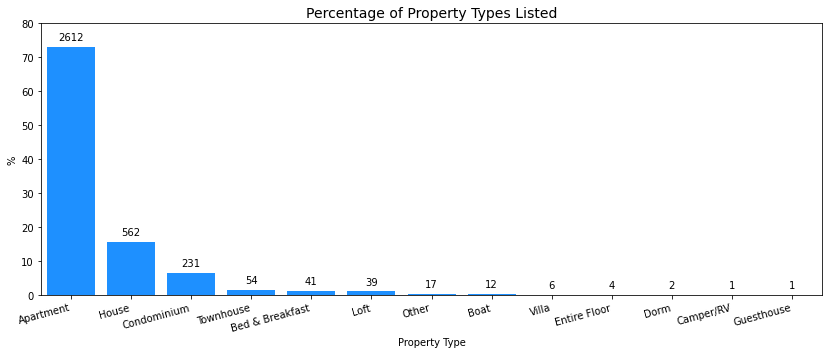

In [41]:
fig, ax1 = plt.subplots(figsize=(14, 5), sharex=False, sharey=True)

g1 = sns.barplot(data=property_types, x='property_type', y='% listing', ax=ax1, facecolor='#1E90FF')

_ = g1.set_title('Percentage of Property Types Listed', fontsize=14)
_ = g1.set_ylabel('%')
_ = g1.set_xlabel('Property Type')
_ = g1.set_xticklabels(g1.get_xticklabels(), rotation=15, horizontalalignment='right')

for x, y, v in list(zip(range(property_types['property_type'].shape[0]), property_types['% listing'], property_types['listings'])):
    g1.text(x, y+2, v, color='black', ha='center')

plt.ylim(0, 80)


# fig.suptitle('Percentage of Property Type', fontsize=14)

In [42]:
# The first 6 property types account for more than the 90% of the listings
property_types.iloc[:6]['% listing'].sum()

98.79955332216637

In [43]:
prts = list(property_types.iloc[:6]['property_type'])
prts

['Apartment', 'House', 'Condominium', 'Townhouse', 'Bed & Breakfast', 'Loft']

In [44]:
# Based on the above take only the the 6 first property types to compare the occupancy 
property_type_avl = calendar.query('property_type == @prts').groupby(['property_type', 'available']).agg({'listing_id':'count'}).unstack().fillna(0).reset_index()
property_type_avl.columns = ['property_type'] + ['busy' if c[1]=='f' else 'available' for c in property_type_avl.columns[1:]]
property_type_avl['total_days'] = property_type_avl['busy'] + property_type_avl['available']
property_type_avl['% busy'] = (property_type_avl['busy'] / property_type_avl['total_days']) * 100

property_type_avl = property_type_avl.sort_values('% busy', ascending=False)

property_type_avl


,property_type,busy,available,total_days,% busy
4,Loft,8840,5395,14235,62.10
2,Condominium,50885,33430,84315,60.35
5,Townhouse,11548,8162,19710,58.59
0,Apartment,501395,452350,953745,52.57
3,House,82196,122934,205130,40.07
1,Bed & Breakfast,4051,10914,14965,27.07


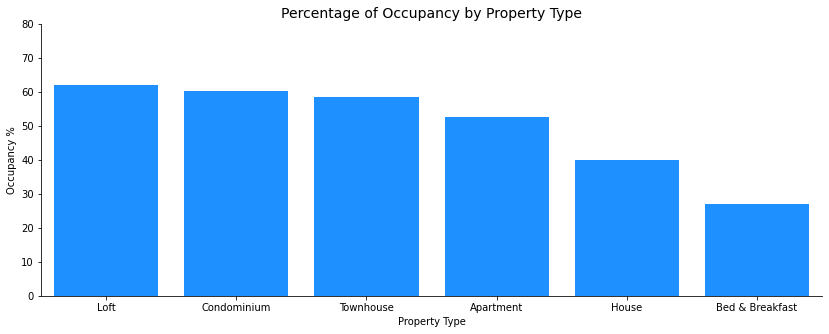

In [46]:
fig, axis = plt.subplots(figsize=(14, 5))

g = sns.barplot(data=property_type_avl, x='property_type', y='% busy', ax=axis, facecolor='#1E90FF')
_ = g.set_title('Percentage of Occupancy by Property Type', fontsize=14)
_ = g.set_ylabel('Occupancy %')
_ = g.set_xlabel('Property Type')

sns.despine()

plt.ylim(0, 80);

# g.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), ncol=1)

In [47]:
monthly_occupancy = calendar.query('property_type == @prts').groupby(['property_type', pd.Grouper(key='date', freq='1M'), 'available'])\
    .agg({'listing_id':'count'}).unstack().fillna(0).reset_index()

monthly_occupancy.columns = ['property_type', 'date'] + ['busy' if c[1]=='f' else 'available' for c in monthly_occupancy.columns[2:]]

monthly_occupancy['total'] = monthly_occupancy['busy'] + monthly_occupancy['available']

monthly_occupancy['% busy'] = (monthly_occupancy['busy'] / monthly_occupancy['total']) * 100

monthly_occupancy

,property_type,date,busy,available,total,% busy
0,Apartment,2016-09-30,47652,17673,65325,72.95
1,Apartment,2016-10-31,47771,33232,81003,58.97
2,Apartment,2016-11-30,35988,42402,78390,45.91
3,Apartment,2016-12-31,37278,43725,81003,46.02
4,Apartment,2017-01-31,36206,44797,81003,44.70
...,...,...,...,...,...,...
73,Townhouse,2017-05-31,1108,566,1674,66.19
74,Townhouse,2017-06-30,1090,530,1620,67.28
75,Townhouse,2017-07-31,1146,528,1674,68.46
76,Townhouse,2017-08-31,1128,546,1674,67.38


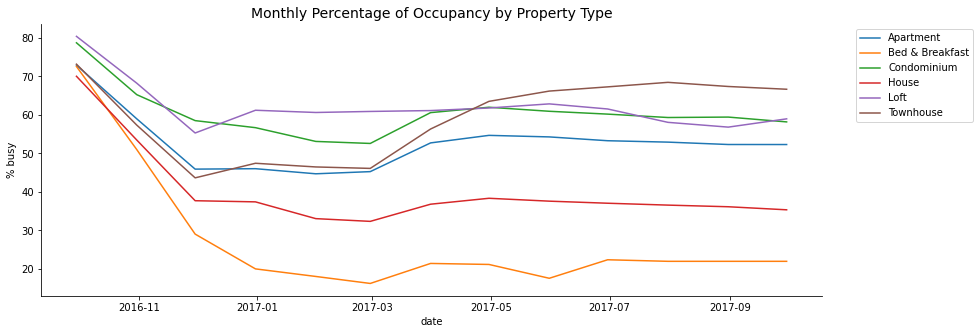

In [48]:
fig, ax = plt.subplots(figsize=(14, 5))

g = sns.lineplot(data=monthly_occupancy, x='date', y='% busy', hue='property_type', ax=ax)

g.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), ncol=1)

_ = g.set_title('Monthly Percentage of Occupancy by Property Type', fontsize=14)

sns.despine()

### Do the prices of a listing vary along the year?

In [49]:
monthly_price = calendar.query('property_type == @prts').groupby(['property_type', pd.Grouper(key='date', freq='1M')]).agg({'price':'mean'}).reset_index()
monthly_price.columns = ['property_type', 'date', 'price']

monthly_price.head()


,property_type,date,price
0,Apartment,2016-09-30,77.34
1,Apartment,2016-10-31,106.93
2,Apartment,2016-11-30,120.16
3,Apartment,2016-12-31,111.42
4,Apartment,2017-01-31,107.54


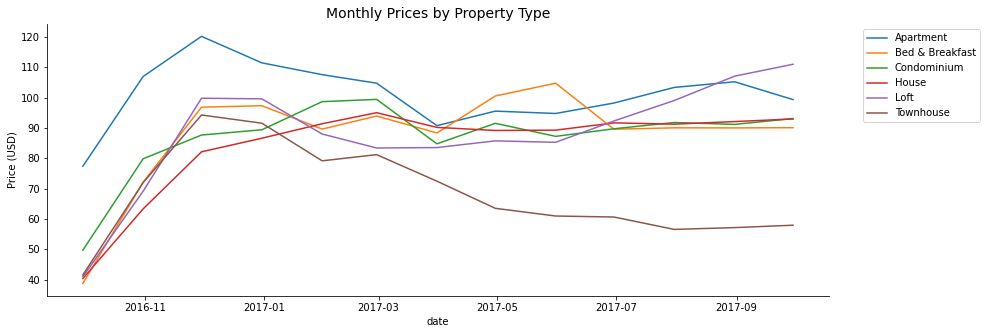

In [50]:
fig, ax = plt.subplots(figsize=(14, 5))

g = sns.lineplot(data=monthly_price, x='date', y='price', hue='property_type', ax=ax)

g.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), ncol=1)

_ = g.set_title('Monthly Prices by Property Type', fontsize=14)
_ = g.set_ylabel('Price (USD)')

sns.despine()


### Is it possible to predict the price of a listing based on its features, like number of rooms, beds, bathrooms, etc.?

In [51]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [52]:
listings.shape

(3582, 95)

In [124]:
# Use the following columns to work on the prediction
columns = [
        'latitude', 'longitude',
        'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',
       'price', 'number_of_reviews',
        'review_scores_rating',
       'review_scores_location', 'review_scores_value'
       ]

In [125]:
listings[columns].head(2)

,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,number_of_reviews,review_scores_rating,review_scores_location,review_scores_value
0,42.28,-71.13,House,Entire home/apt,4,1.50,2.00,3.00,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.00,0,0.00,0.00,0.00
1,42.29,-71.13,Apartment,Private room,2,1.00,1.00,1.00,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.00,36,94.00,9.00,9.00


In [126]:
listings[columns].isna().sum()

latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
bed_type                  0
amenities                 0
price                     0
number_of_reviews         0
review_scores_rating      0
review_scores_location    0
review_scores_value       0
dtype: int64

In [56]:
listings['review_scores_rating'].fillna(0, inplace=True)
listings['review_scores_location'].fillna(0, inplace=True)
listings['review_scores_value'].fillna(0, inplace=True)

In [57]:
for i, r in tqdm(listings.iterrows(), total=listings.shape[0]):
    a = r['amenities'].split(',')
    for item in a:
        item = item.replace('"', '').replace("{","").replace("}","")
        if item not in listings.columns:
            listings[item] = None
            listings.at[i, item] = 1
        else:
            listings.at[i, item] = 1

    

100%|██████████| 3582/3582 [00:00<00:00, 3695.58it/s]


In [58]:
listings.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,TV,Wireless Internet,Kitchen,Free Parking on Premises,Pets live on this property,Dog(s),Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Fire Extinguisher,Essentials,Shampoo,Laptop Friendly Workspace,Internet,Air Conditioning,Pets Allowed,Carbon Monoxide Detector,Lock on Bedroom Door,Hangers,Hair Dryer,Iron,Cable TV,First Aid Kit,Safety Card,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Gym,Breakfast,Indoor Fireplace,Cat(s),24-Hour Check-in,Hot Tub,Buzzer/Wireless Intercom,Other pet(s),Washer / Dryer,Smoking Allowed,,Suitable for Events,Wheelchair Accessible,Elevator in Building,Pool,Doorman,Paid Parking Off Premises,Free Parking on Street
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.28,-71.13,t,House,Entire home/apt,4,1.50,2.00,3.00,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,0.00,f,NaN,NaN,f,moderate,f,f,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [127]:
# add the new columns extracted from amenities
columns += list(listings.columns[95:])
columns

['latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_location',
 'review_scores_value',
 'TV',
 'Wireless Internet',
 'Kitchen',
 'Free Parking on Premises',
 'Pets live on this property',
 'Dog(s)',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer',
 'Smoke Detector',
 'Fire Extinguisher',
 'Essentials',
 'Shampoo',
 'Laptop Friendly Workspace',
 'Internet',
 'Air Conditioning',
 'Pets Allowed',
 'Carbon Monoxide Detector',
 'Lock on Bedroom Door',
 'Hangers',
 'Hair Dryer',
 'Iron',
 'Cable TV',
 'First Aid Kit',
 'Safety Card',
 'translation missing: en.hosting_amenity_49',
 'translation missing: en.hosting_amenity_50',
 'Gym',
 'Breakfast',
 'Indoor Fireplace',
 'Cat(s)',
 '24-Hour Check-in',
 'Hot Tub',
 'Buzzer/Wireless Intercom',
 'Other pet(s)',
 'Washer / Dryer',
 'Smoking Allowed',
 '',
 'Suitable for Events',
 'W

In [128]:
# remove some no longer needed columns
columns.remove('')
columns.remove('amenities')

In [129]:
listings[columns].head(1)

,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,review_scores_location,review_scores_value,TV,Wireless Internet,Kitchen,Free Parking on Premises,Pets live on this property,Dog(s),Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Fire Extinguisher,Essentials,Shampoo,Laptop Friendly Workspace,Internet,Air Conditioning,Pets Allowed,Carbon Monoxide Detector,Lock on Bedroom Door,Hangers,Hair Dryer,Iron,Cable TV,First Aid Kit,Safety Card,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Gym,Breakfast,Indoor Fireplace,Cat(s),24-Hour Check-in,Hot Tub,Buzzer/Wireless Intercom,Other pet(s),Washer / Dryer,Smoking Allowed,Suitable for Events,Wheelchair Accessible,Elevator in Building,Pool,Doorman,Paid Parking Off Premises,Free Parking on Street
0,42.28,-71.13,House,Entire home/apt,4,1.50,2.00,3.00,Real Bed,250.00,0,0.00,0.00,0.00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [130]:
# replace all null values of the new columns with zero
for col in columns[14:]:
    listings[col].fillna(0, inplace=True)

In [134]:
# identify categorical columns
catcols = listings[columns].select_dtypes(include=['object']).copy()
catcols.head()

,property_type,room_type,bed_type
0,House,Entire home/apt,Real Bed
1,Apartment,Private room,Real Bed
2,Apartment,Private room,Real Bed
3,House,Private room,Real Bed
4,House,Private room,Real Bed


In [135]:
catcols_name = catcols.columns
for col in catcols_name:
    catcols = pd.concat([catcols.drop(col, axis=1), pd.get_dummies(
        catcols[col],
        prefix=col,
        prefix_sep='_',
        drop_first=True,
        dummy_na=False
    )], axis=1)

In [136]:
catcols.head()

,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [141]:
# remove categorical column names from columns
for col in catcols_name:
    columns.remove(col)

# add dummy categorical column names

columns += list(catcols.columns)

columns

['latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_location',
 'review_scores_value',
 'TV',
 'Wireless Internet',
 'Kitchen',
 'Free Parking on Premises',
 'Pets live on this property',
 'Dog(s)',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer',
 'Smoke Detector',
 'Fire Extinguisher',
 'Essentials',
 'Shampoo',
 'Laptop Friendly Workspace',
 'Internet',
 'Air Conditioning',
 'Pets Allowed',
 'Carbon Monoxide Detector',
 'Lock on Bedroom Door',
 'Hangers',
 'Hair Dryer',
 'Iron',
 'Cable TV',
 'First Aid Kit',
 'Safety Card',
 'translation missing: en.hosting_amenity_49',
 'translation missing: en.hosting_amenity_50',
 'Gym',
 'Breakfast',
 'Indoor Fireplace',
 'Cat(s)',
 '24-Hour Check-in',
 'Hot Tub',
 'Buzzer/Wireless Intercom',
 'Other pet(s)',
 'Washer / Dryer',
 'Smoking Allowed',
 'Suitable for Events',
 'Wheelchair Accessible',
 'Elevator in Building',
 'Pool',
 'Doorm

In [143]:
# merge dummy columns to listings
listings = pd.concat([listings, catcols], axis=1)

In [144]:
listings[columns].head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,review_scores_location,review_scores_value,TV,Wireless Internet,Kitchen,Free Parking on Premises,Pets live on this property,Dog(s),Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Fire Extinguisher,Essentials,Shampoo,Laptop Friendly Workspace,Internet,Air Conditioning,Pets Allowed,Carbon Monoxide Detector,Lock on Bedroom Door,Hangers,Hair Dryer,Iron,Cable TV,First Aid Kit,Safety Card,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Gym,Breakfast,Indoor Fireplace,Cat(s),24-Hour Check-in,Hot Tub,Buzzer/Wireless Intercom,Other pet(s),Washer / Dryer,Smoking Allowed,Suitable for Events,Wheelchair Accessible,Elevator in Building,Pool,Doorman,Paid Parking Off Premises,Free Parking on Street,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,42.28,-71.13,4,1.50,2.00,3.00,250.00,0,0.00,0.00,0.00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,42.29,-71.13,2,1.00,1.00,1.00,65.00,36,94.00,9.00,9.00,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,42.29,-71.14,2,1.00,1.00,1.00,65.00,41,98.00,9.00,10.00,1,1,1,1,0,0,1,0,1,1,1,0,1,1,0,0,1,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,42.28,-71.12,4,1.00,1.00,2.00,75.00,1,100.00,10.00,10.00,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,42.28,-71.14,2,1.50,1.00,2.00,79.00,29,99.00,9.00,10.00,0,1,1,0,0,0,1,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [149]:
# remove those columns that do not have positive or negative correlation with price
corr = listings[columns].corr().sort_values('price', ascending=False)['price']

corr[corr<0]
# corrpositive = list(corr[corr>0.05].index)
# corrnegative = list(corr[corr<-0.03].index)

# columns = corrpositive + corrnegative
# columns

Carbon Monoxide Detector                     -0.00
property_type_Entire Floor                   -0.01
Free Parking on Street                       -0.01
property_type_Camper/RV                      -0.01
Safety Card                                  -0.02
property_type_Dorm                           -0.02
Smoke Detector                               -0.02
property_type_Townhouse                      -0.02
Other pet(s)                                 -0.02
bed_type_Couch                               -0.03
property_type_Bed & Breakfast                -0.03
bed_type_Pull-out Sofa                       -0.05
Hot Tub                                      -0.05
Cat(s)                                       -0.05
Pets live on this property                   -0.06
First Aid Kit                                -0.06
review_scores_location                       -0.06
Breakfast                                    -0.06
Smoking Allowed                              -0.07
bed_type_Futon                 

<AxesSubplot:>

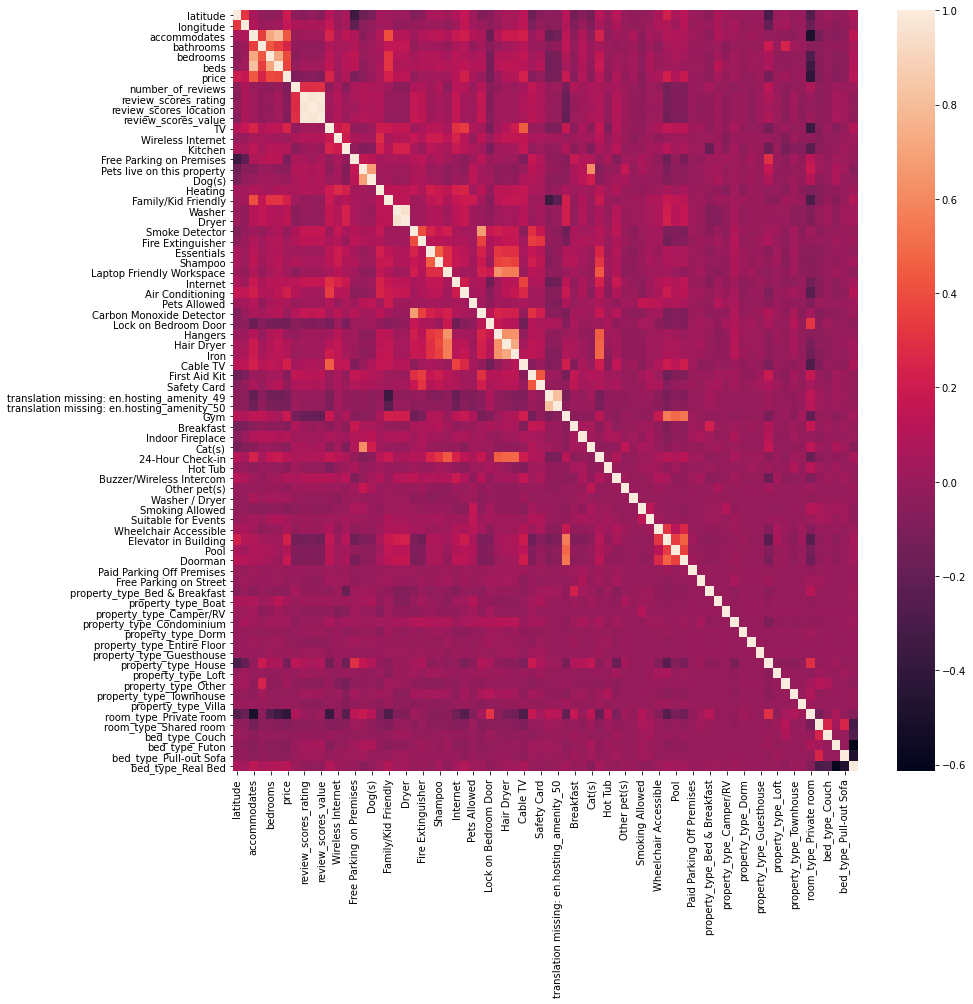

In [153]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(listings[columns].corr(), ax=ax)

In [162]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [151]:
scaler = MinMaxScaler()
scaler.fit(listings[['longitude']])
listings['longitude'] = scaler.transform(listings[['longitude']])
# listings[['longitude', 'longitude_scaled']].head()

In [152]:
scaler = MinMaxScaler()
scaler.fit(listings[['latitude']])
listings['latitude'] = scaler.transform(listings[['latitude']])
# listings[['latitude', 'latitude_scaled']].head()

In [154]:
x = listings[columns]
y = listings['price']

x = x.drop('price', axis='columns')


In [156]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=42)

In [159]:
lm_model = LinearRegression(normalize=True)

In [160]:
lm_model.fit(x_train, y_train)

LinearRegression(normalize=True)

In [161]:
y_test_pred = lm_model.predict(x_test)

In [163]:
r2_score(y_test, y_test_pred)

0.25021761155741873